<a href="https://colab.research.google.com/github/ancestor9/llm/blob/main/%EC%9B%90%EC%9D%B8%EC%9A%94%EC%86%8C2_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and direc

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
import pandas as pd

sf = pd.read_excel('/content/실제_예측.xlsx')
sf


,Unnamed: 0,내용,예측_원인요소,원인요소_2
0,7613,"광시장족자치구(广西壮族自治区) 시장감독관리국, 3대 식품(샘플 126건) 중 전분 ...",미생물,미생물
1,3341,"장쑤(江苏)성 시장감독관리국, 식품 샘플 806건 중 12건 부적합(식용농산물 2건...",미생물,미생물
2,14529,- 통보일자: 28/04/2020- 통보번호: 2020.1794 - 통보국: 네덜란...,곰팡이독소,곰팡이독소
3,19052,-수입상: Tea House Taipei(公悅企業有限公司)-수입상 주소: 타오위안(...,잔류농약,잔류농약
4,3474,- 통보일자: 06/11/2020- 통보번호: 2020.4814 - 통보국: 불가리...,곰팡이독소,곰팡이독소
...,...,...,...,...
995,17206,- 통보일자: 21/02/2020- 통보번호: 2020.0877 - 통보국: 독일-...,이물질,이물질
996,2859,"일본 농림수산성은 11월 15일, 카가와현의 고병원성 조류인플루엔자 의사환축의 확인...",동식물질병,동식물질병
997,1493,-제조사식별번호: 3010791553-제조사명: Samyang Foods Co Lt...,알레르기,알레르기
998,14644,"[중앙 계획 샘플검사] 푸젠(福建)성 시장감독관리국, 19대 식품(669건 샘플) ...",미생물,기타


In [8]:

y_true = sf['원인요소_2']
y_pred = sf['예측_원인요소']

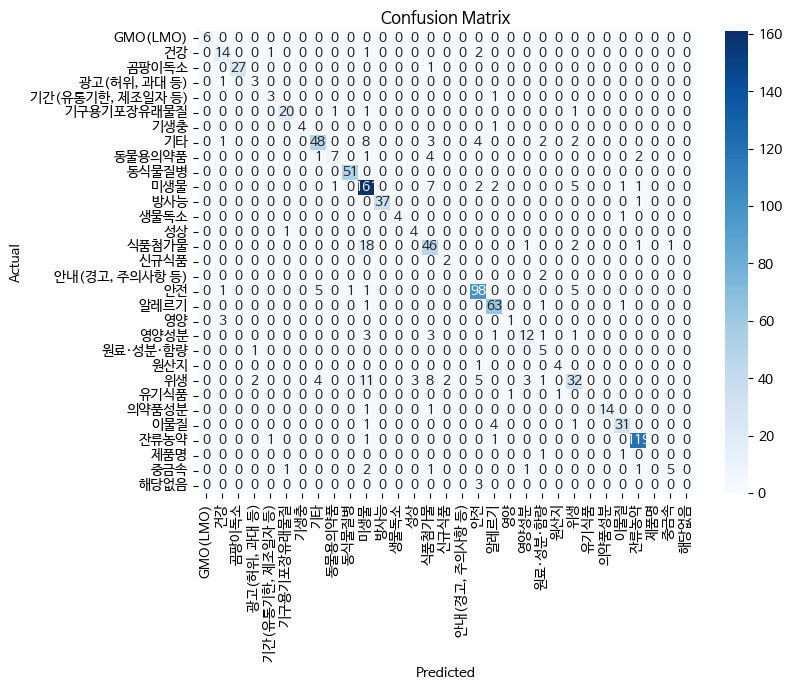

Classification Report:

                  precision    recall  f1-score   support

        GMO(LMO)       1.00      1.00      1.00         6
              건강       0.70      0.78      0.74        18
           곰팡이독소       1.00      0.96      0.98        28
    광고(허위, 과대 등)       0.50      0.75      0.60         4
기간(유통기한, 제조일자 등)       0.60      0.75      0.67         4
      기구용기포장유래물질       0.91      0.87      0.89        23
             기생충       1.00      0.80      0.89         5
              기타       0.83      0.71      0.76        68
          동물용의약품       0.78      0.47      0.58        15
           동식물질병       0.98      1.00      0.99        51
             미생물       0.76      0.89      0.82       180
             방사능       1.00      0.97      0.99        38
            생물독소       1.00      0.80      0.89         5
              성상       0.57      0.80      0.67         5
           식품첨가물       0.62      0.67      0.64        69
            신규식품       0.50      1.00      0.67

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def plot_confusion_matrix_and_classification_report(y_true, y_pred, class_names=None):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # If class_names is not provided, infer from unique values in y_true and y_pred
    if class_names is None:
        class_names = np.unique(np.concatenate((y_true, y_pred)))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Display classification report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n")
    print(report)

# Plot confusion matrix and classification report
# Infer class names from the data if not explicitly provided
plot_confusion_matrix_and_classification_report(y_true, y_pred)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

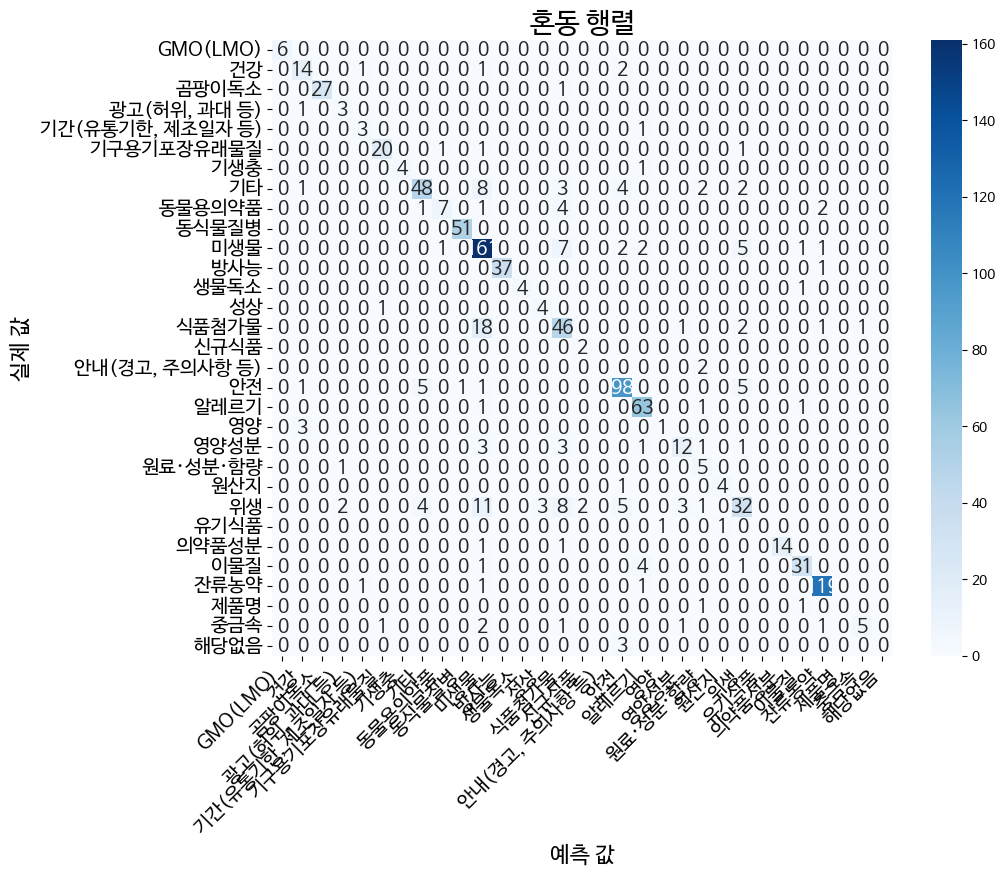

분류 보고서:

                  precision    recall  f1-score   support

        GMO(LMO)       1.00      1.00      1.00         6
              건강       0.70      0.78      0.74        18
           곰팡이독소       1.00      0.96      0.98        28
    광고(허위, 과대 등)       0.50      0.75      0.60         4
기간(유통기한, 제조일자 등)       0.60      0.75      0.67         4
      기구용기포장유래물질       0.91      0.87      0.89        23
             기생충       1.00      0.80      0.89         5
              기타       0.83      0.71      0.76        68
          동물용의약품       0.78      0.47      0.58        15
           동식물질병       0.98      1.00      0.99        51
             미생물       0.76      0.89      0.82       180
             방사능       1.00      0.97      0.99        38
            생물독소       1.00      0.80      0.89         5
              성상       0.57      0.80      0.67         5
           식품첨가물       0.62      0.67      0.64        69
            신규식품       0.50      1.00      0.67         2
  안내

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# prompt: classification도 시각화를 이쁘게

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

sf = pd.read_excel('/content/실제_예측.xlsx')
sf


y_true = sf['원인요소_2']
y_pred = sf['예측_원인요소']

def plot_confusion_matrix_and_classification_report(y_true, y_pred, class_names=None):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # If class_names is not provided, infer from unique values in y_true and y_pred
    if class_names is None:
        class_names = np.unique(np.concatenate((y_true, y_pred)))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))  # Increase figure size for better readability
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 14})  # Increase font size of annotations
    plt.xlabel('예측 값', fontsize=16)  # Add label for x-axis
    plt.ylabel('실제 값', fontsize=16)  # Add label for y-axis
    plt.title('혼동 행렬', fontsize=20)  # Add title for the plot
    plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=14)  # Increase font size of y-axis labels
    plt.show()

    # Display classification report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("분류 보고서:\n")
    print(report)

# Plot confusion matrix and classification report
# Infer class names from the data if not explicitly provided
plot_confusion_matrix_and_classification_report(y_true, y_pred)

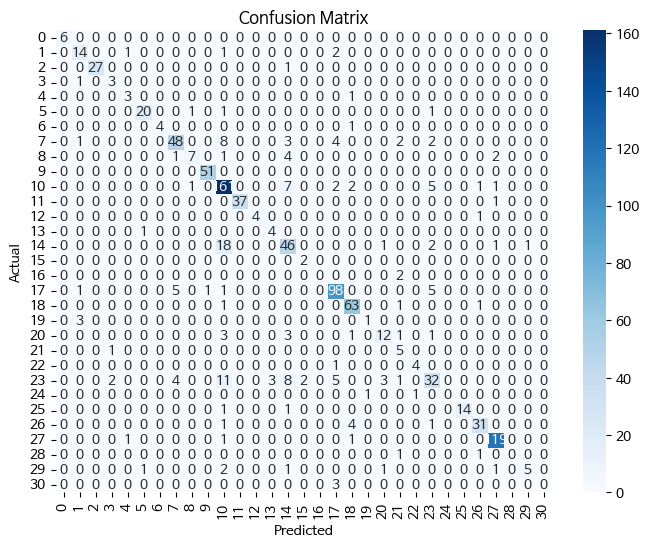

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


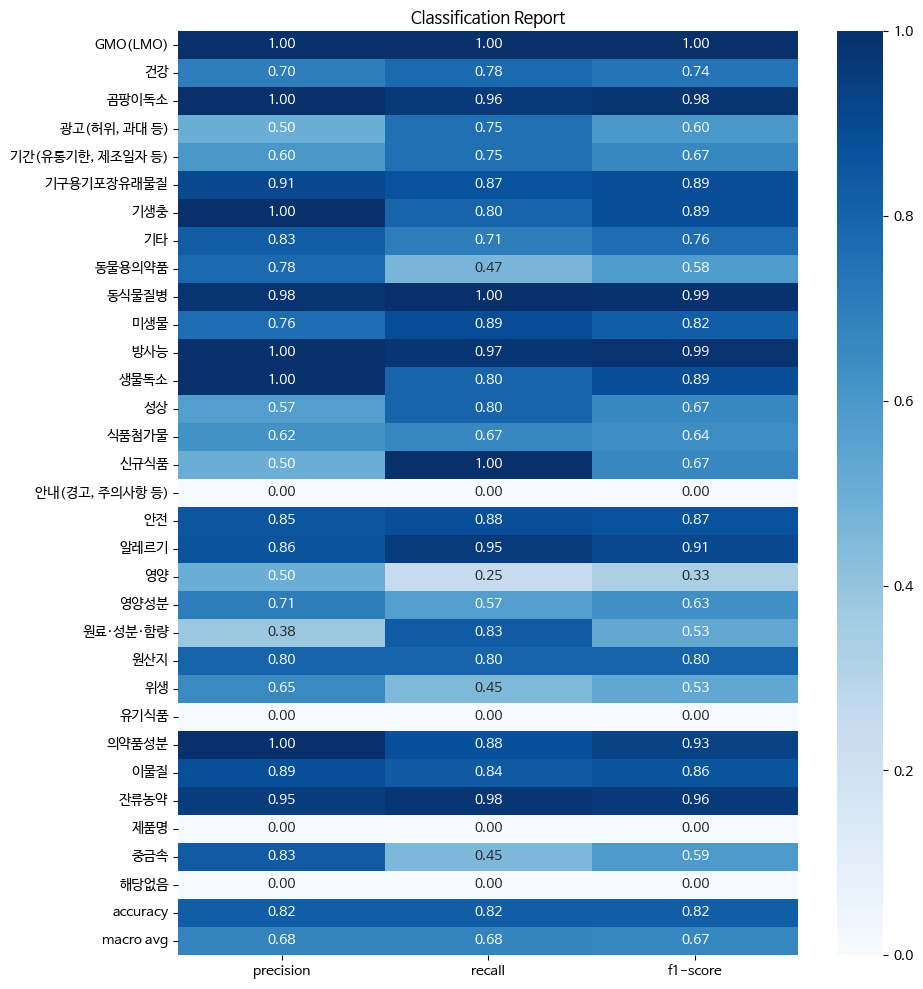

In [11]:
def plot_confusion_matrix_and_classification_report(y_true, y_pred, class_names=None):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Generate classification report
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()

    # Plot classification report as a table
    plt.figure(figsize=(10, 12))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
    plt.title('Classification Report')
    plt.show()

# Example Usage
if __name__ == "__main__":

    # Plot confusion matrix and classification report
    plot_confusion_matrix_and_classification_report(y_true, y_pred, class_names)

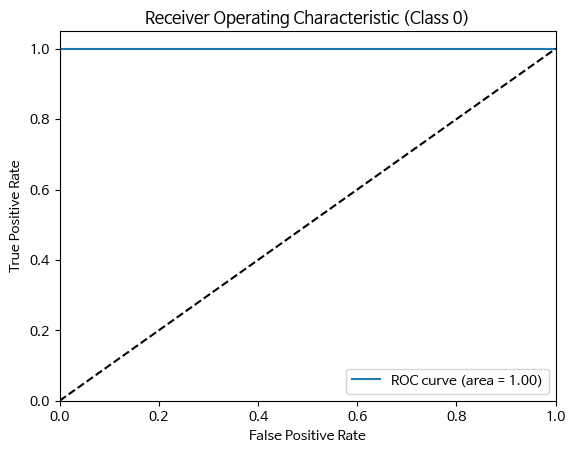

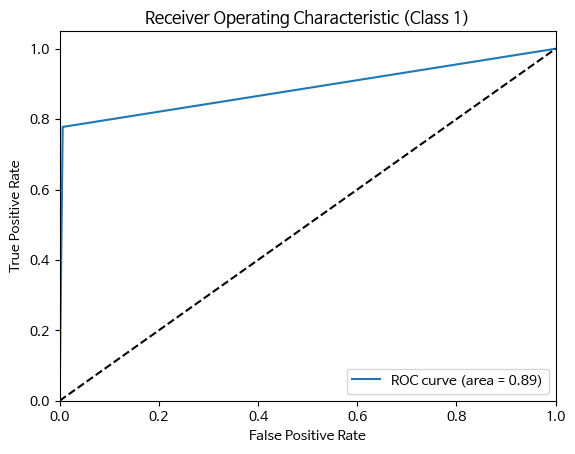

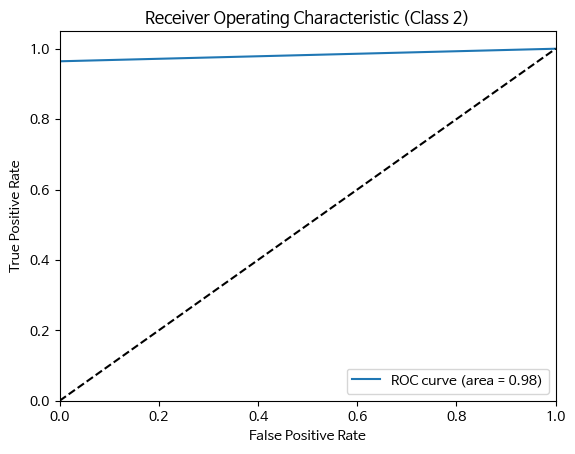

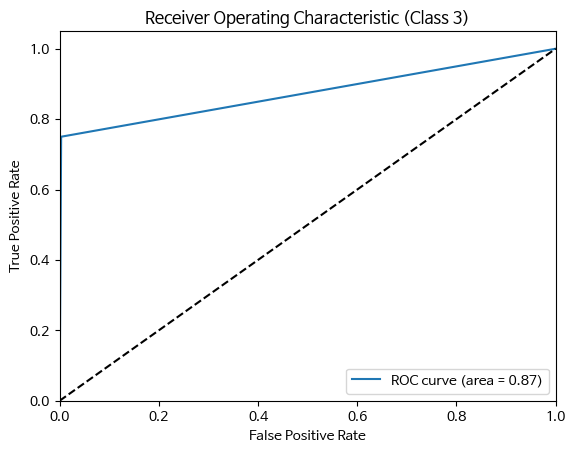

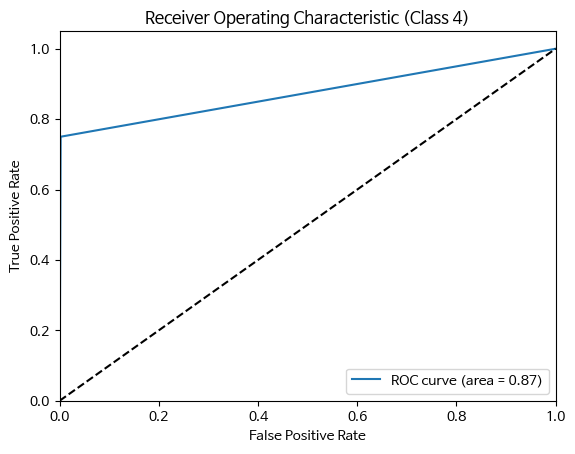

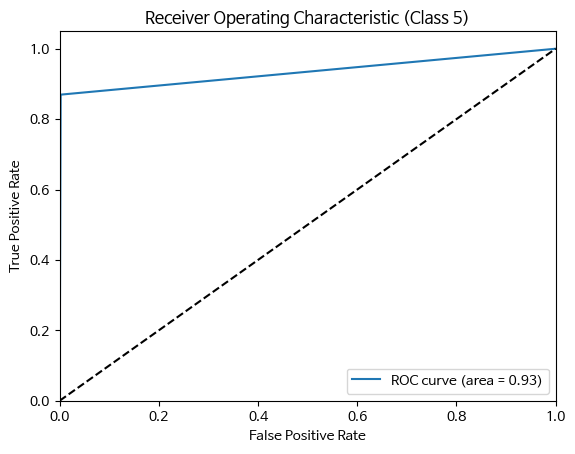

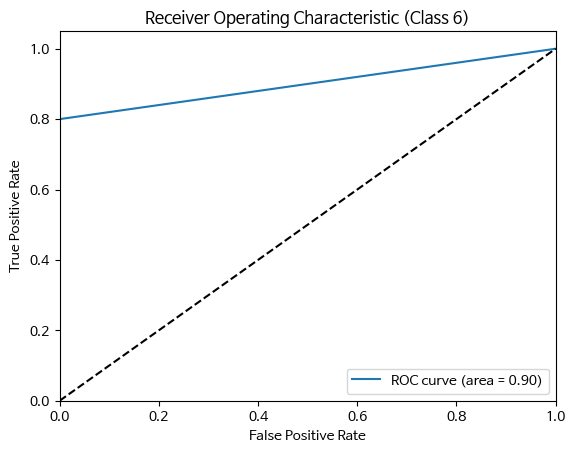

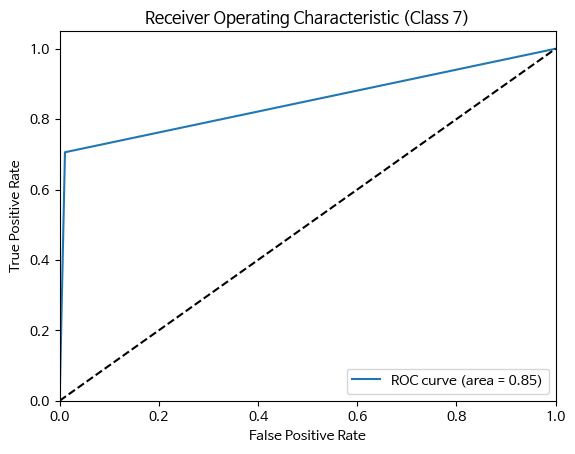

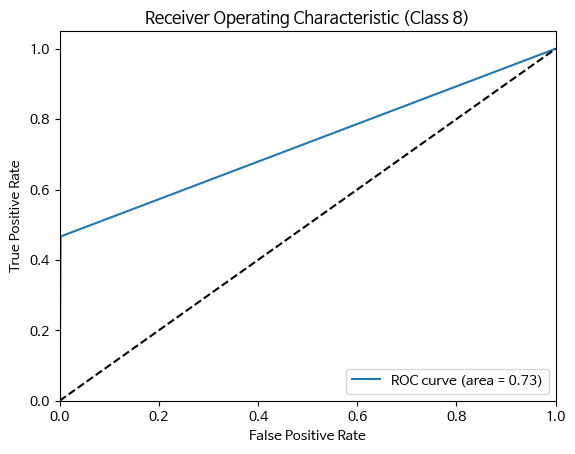

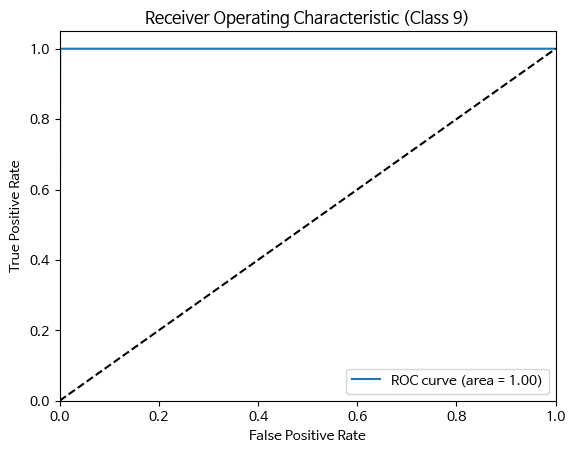

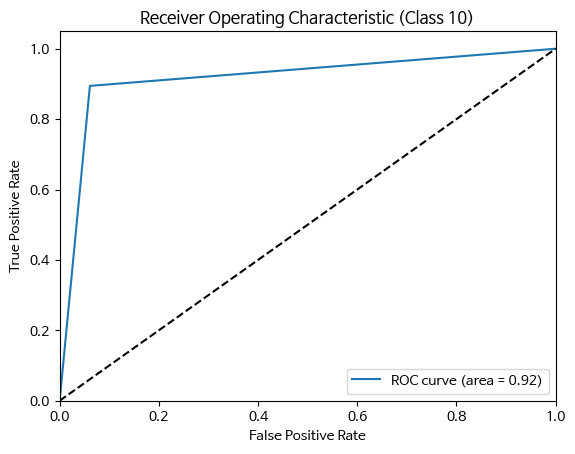

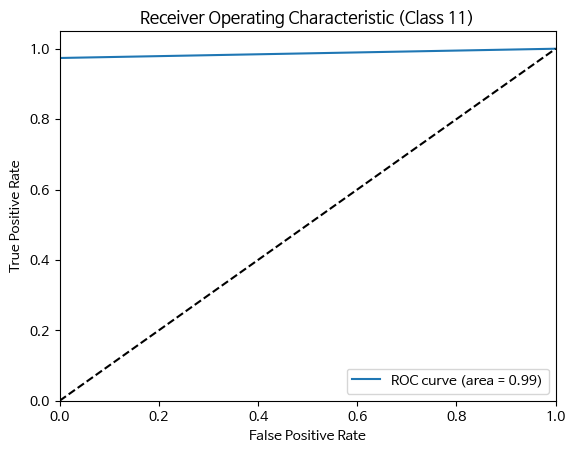

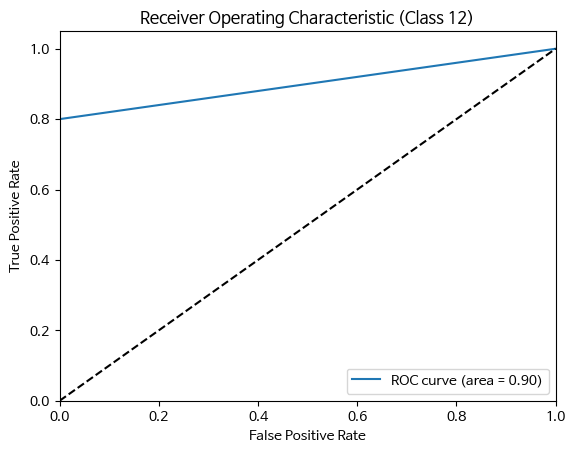

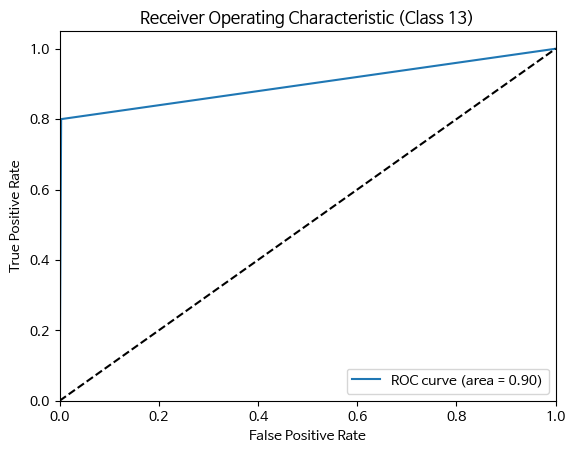

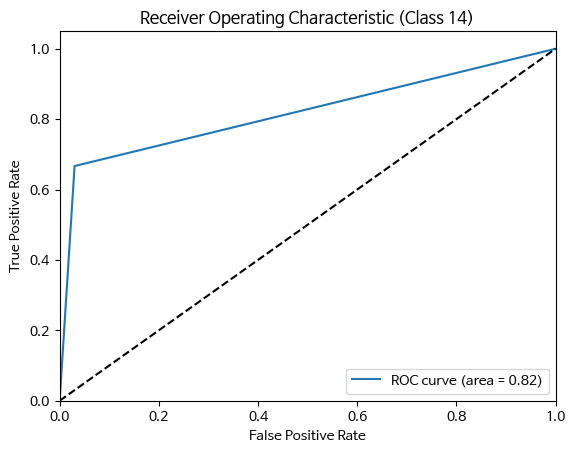

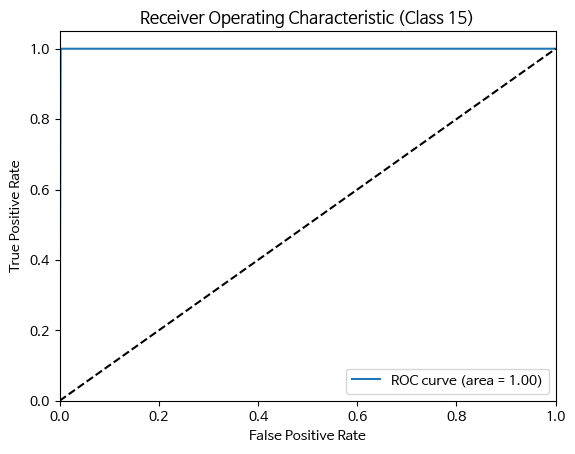

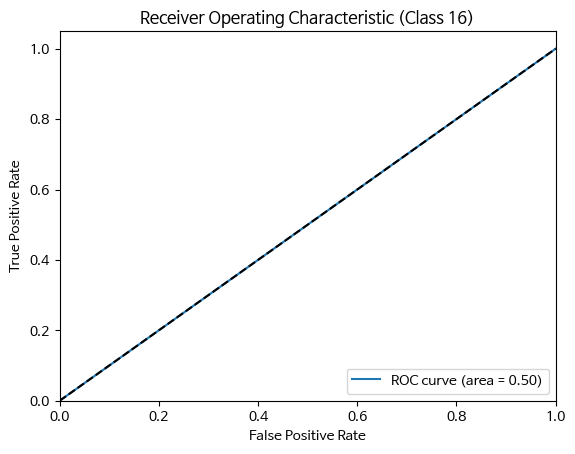

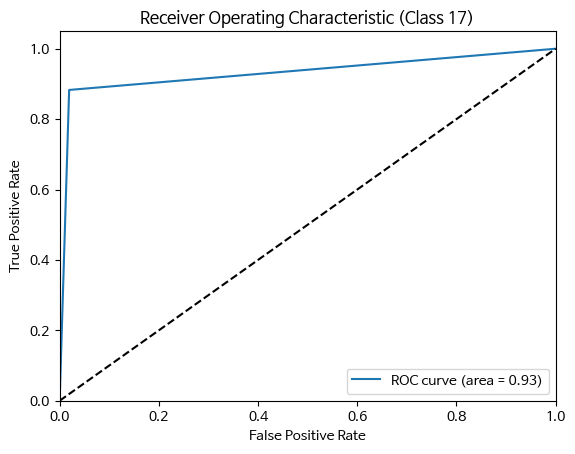

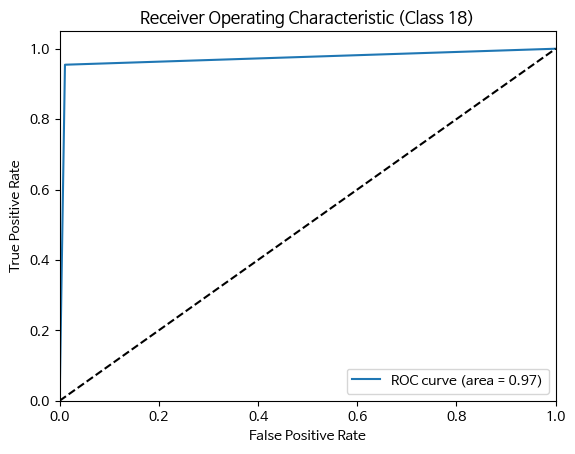

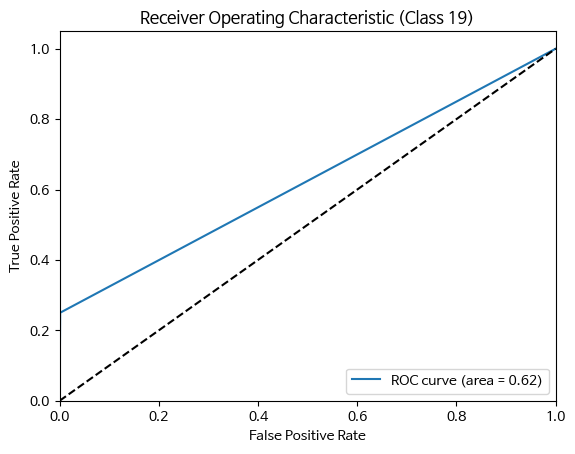

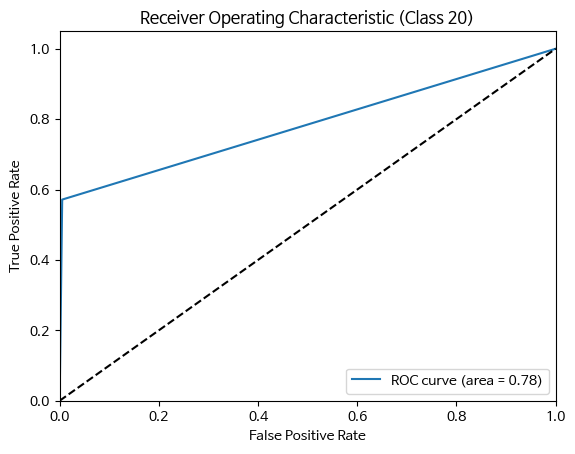

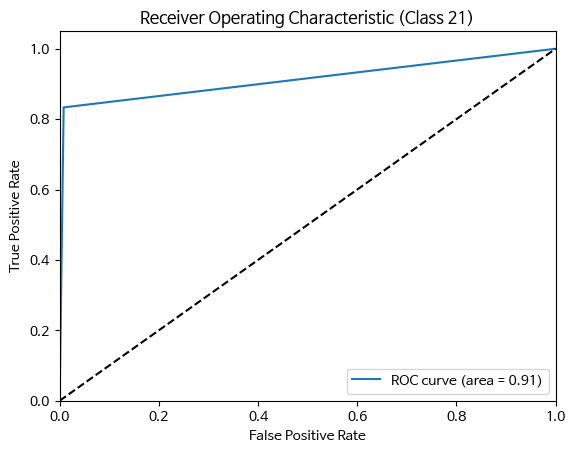

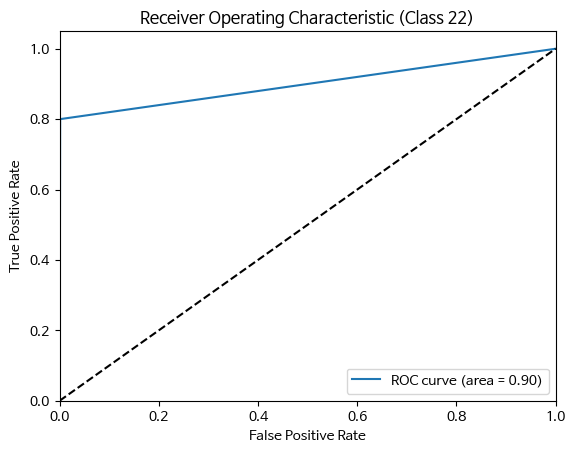

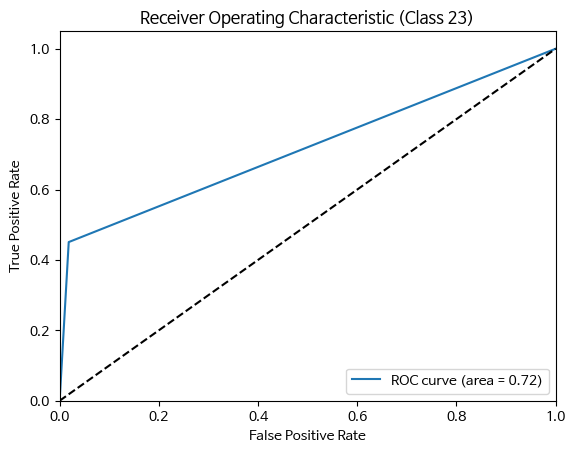

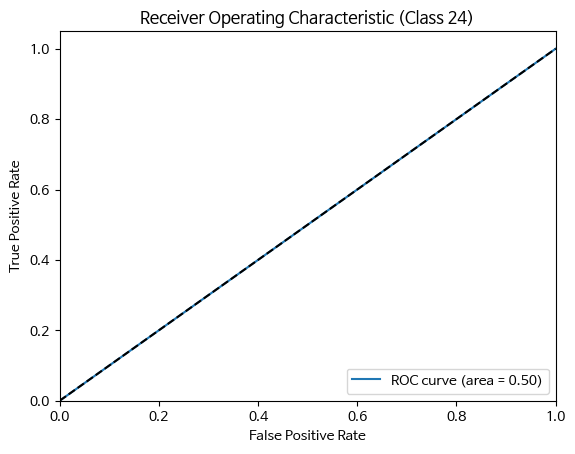

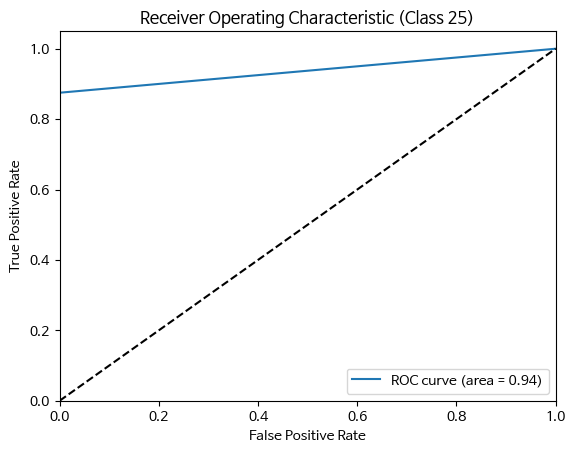

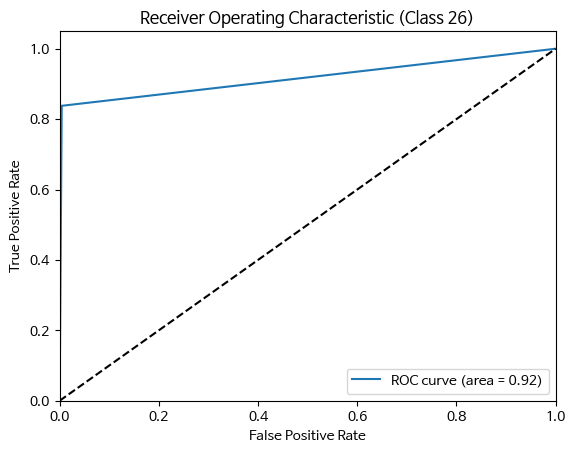

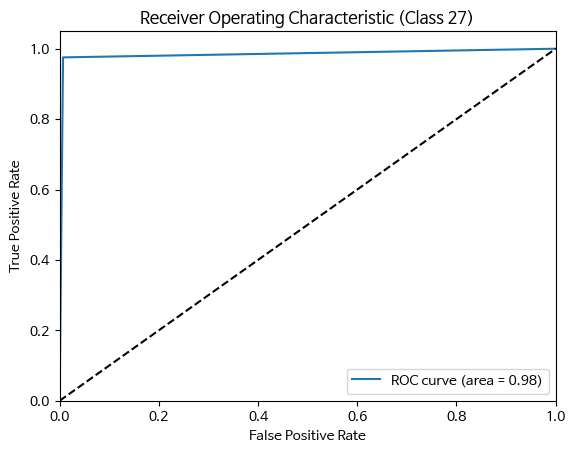

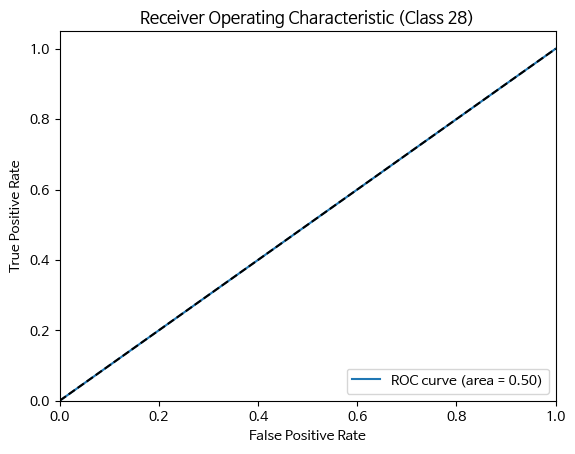

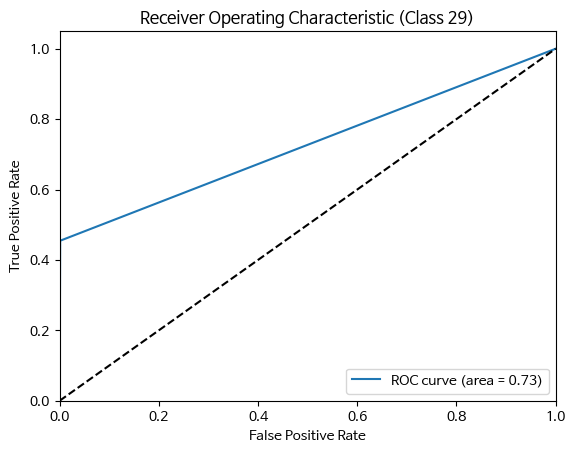

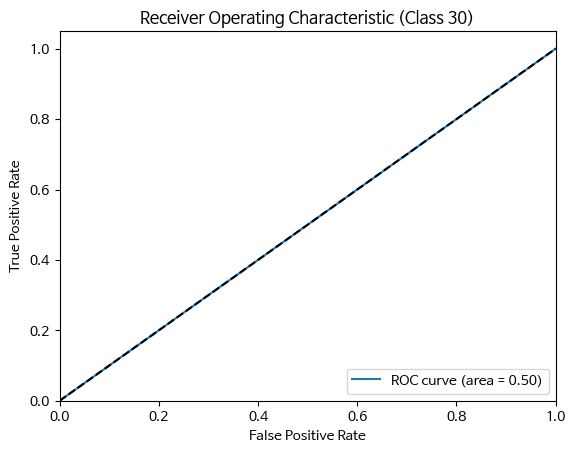

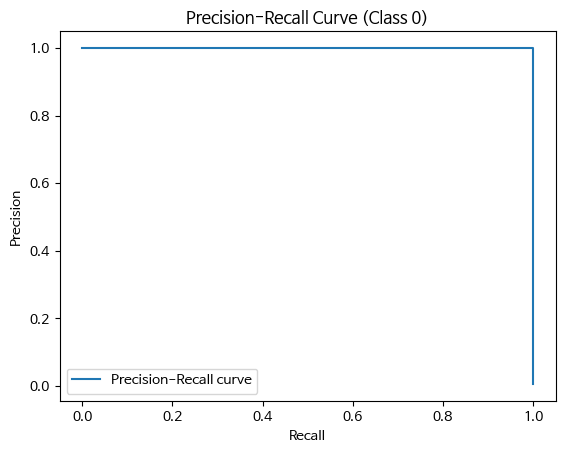

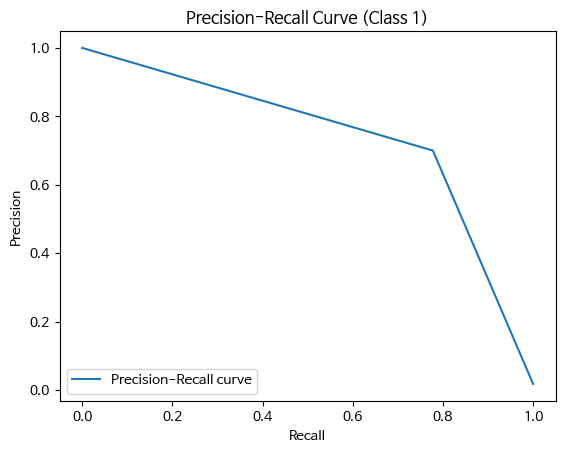

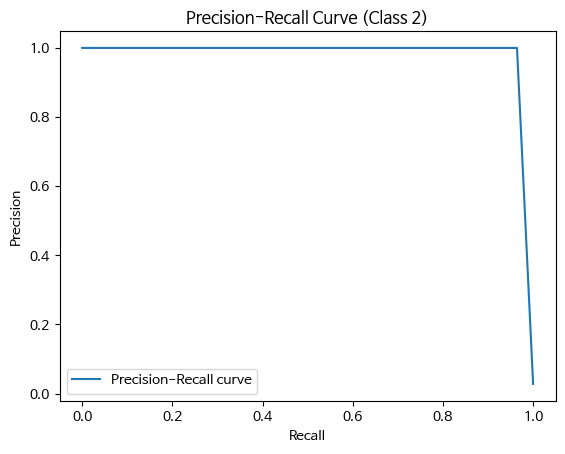

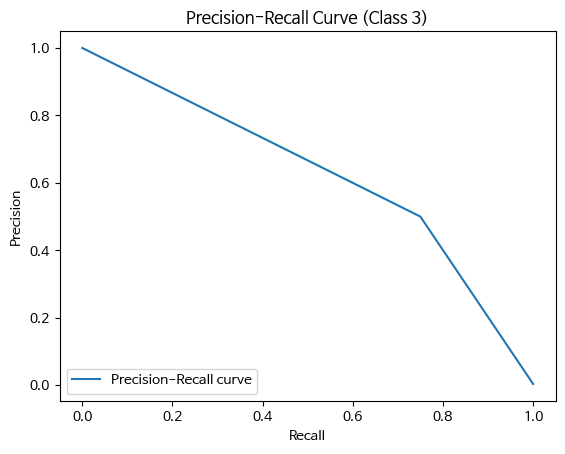

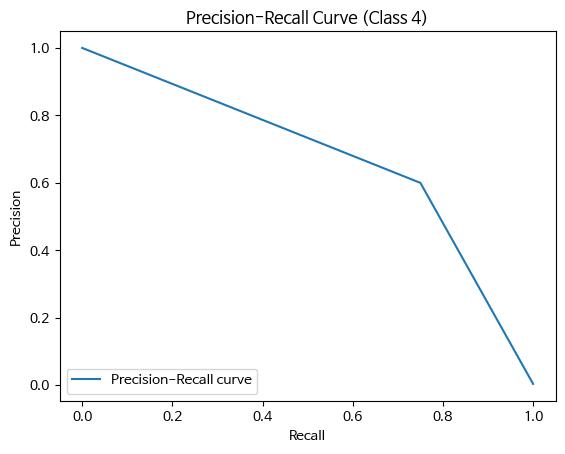

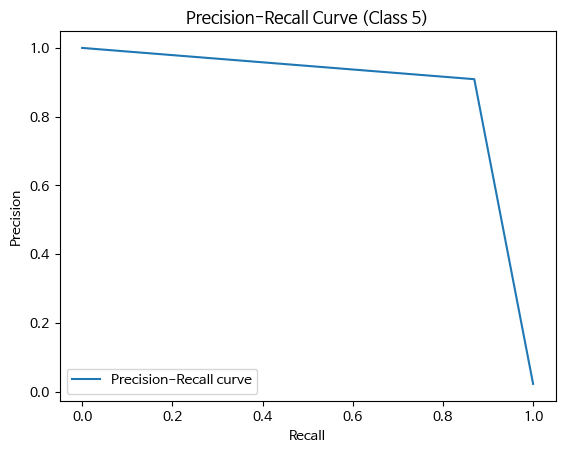

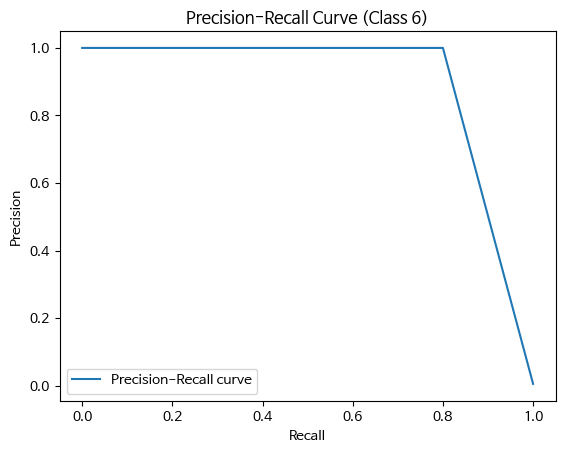

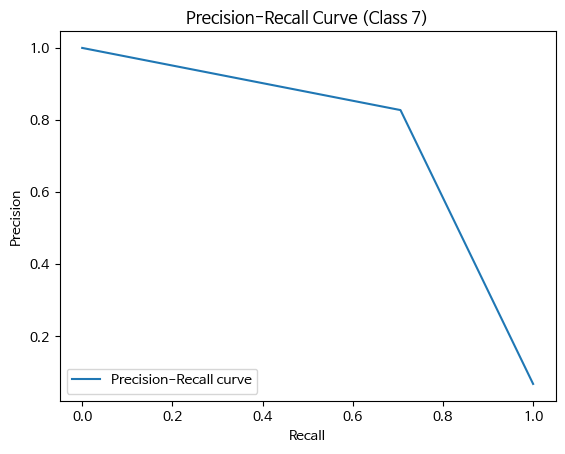

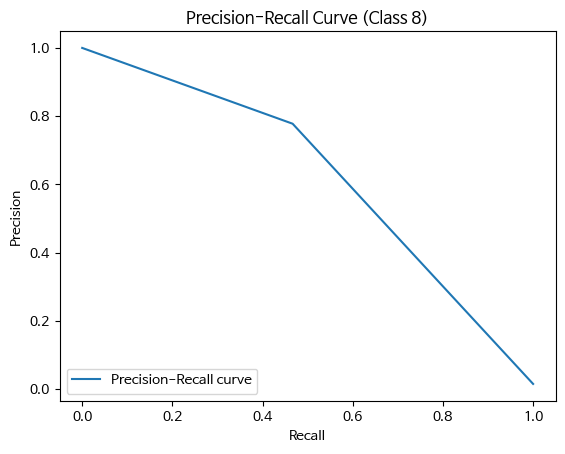

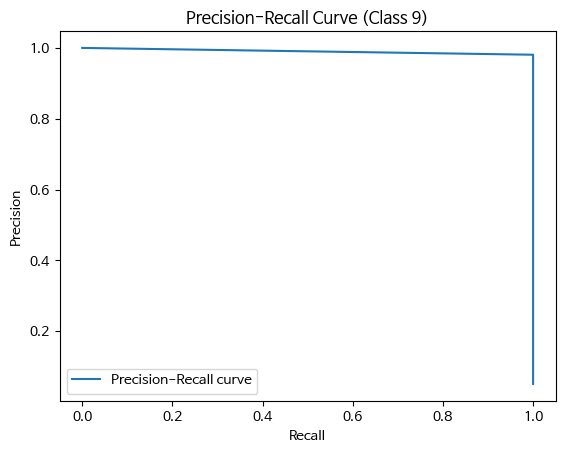

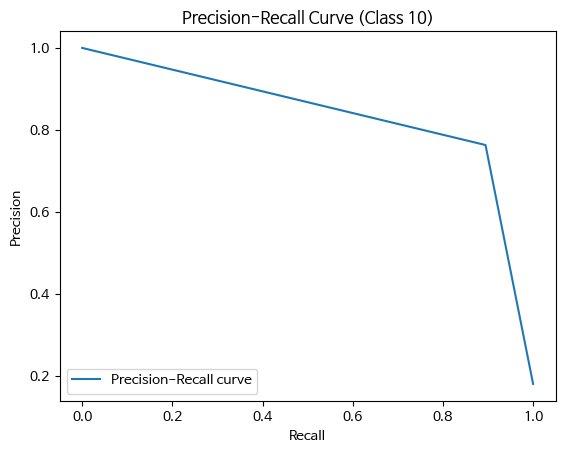

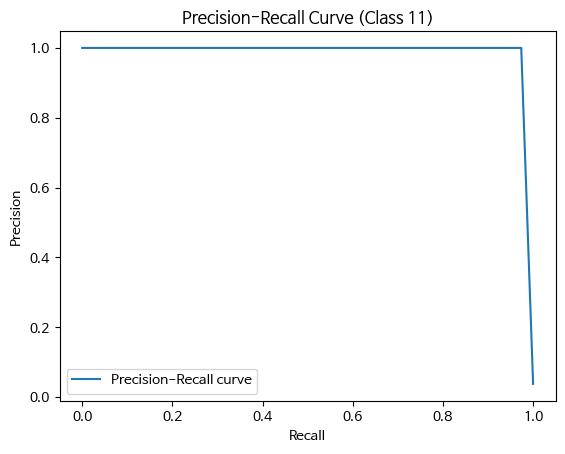

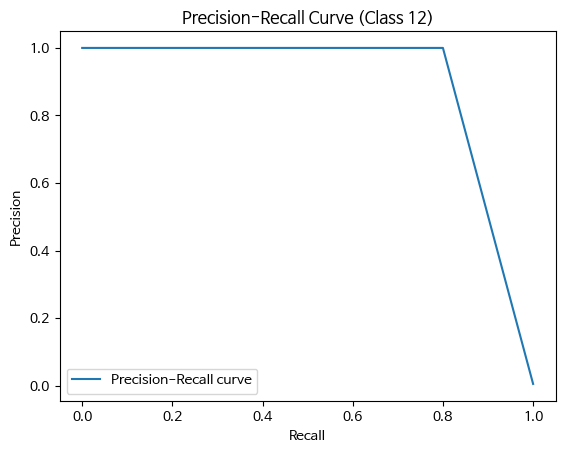

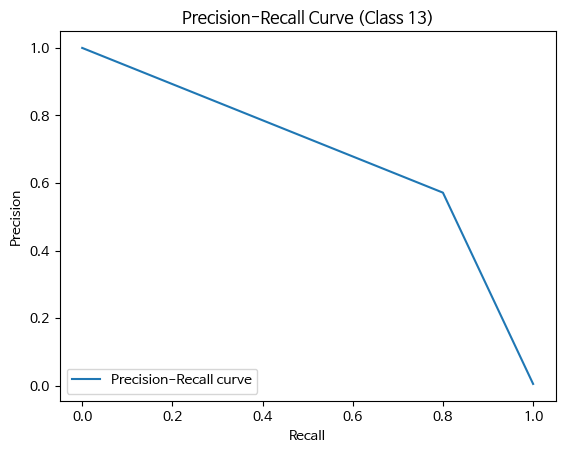

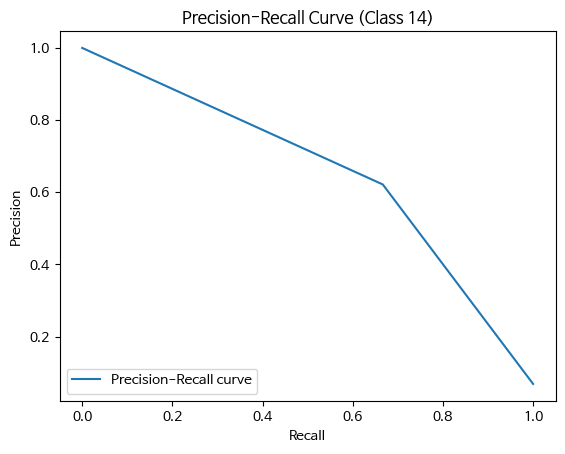

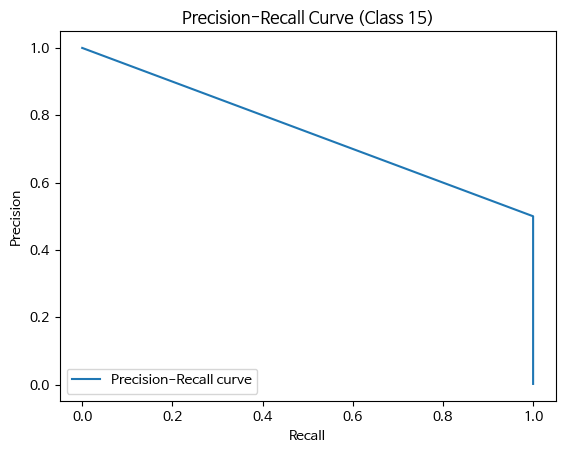

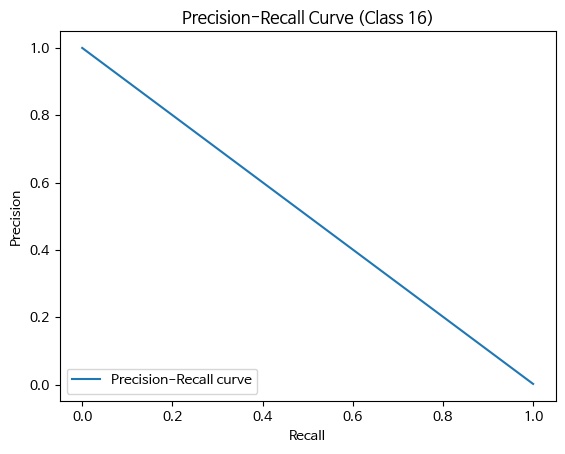

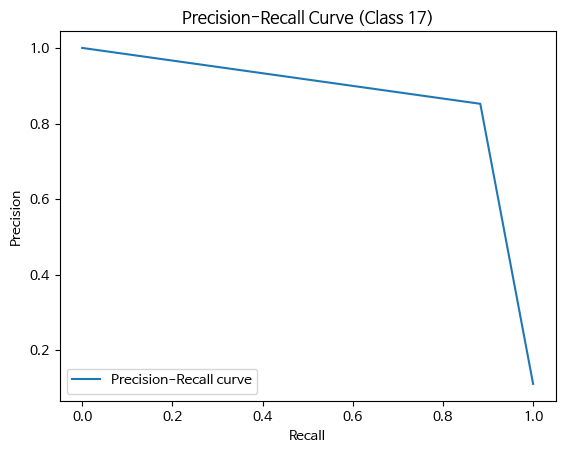

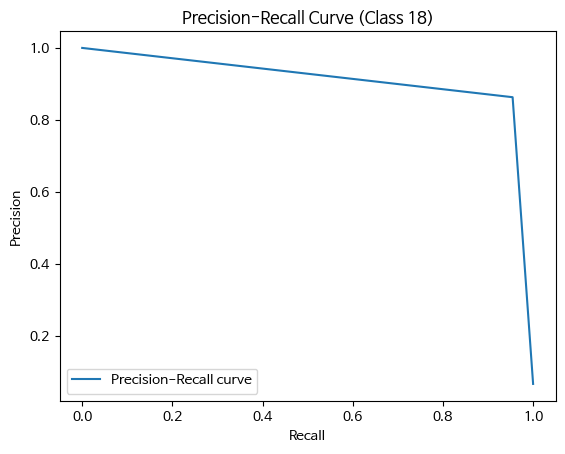

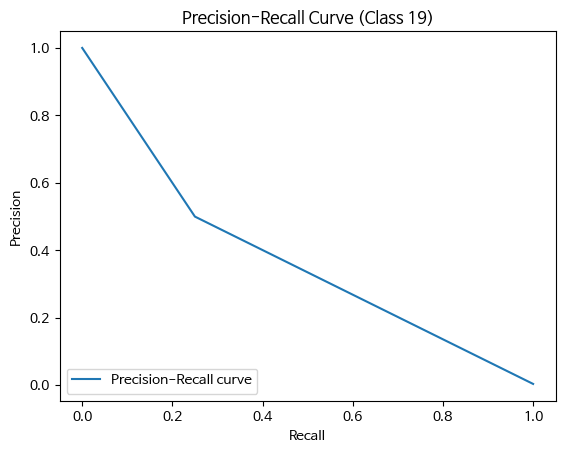

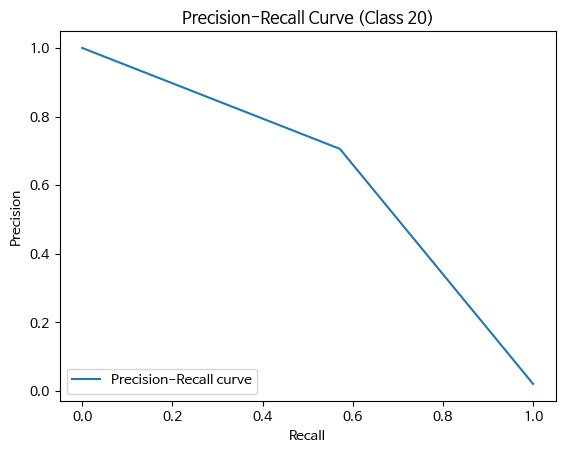

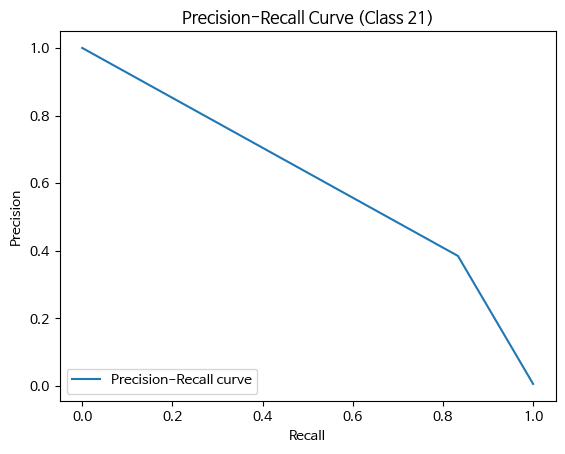

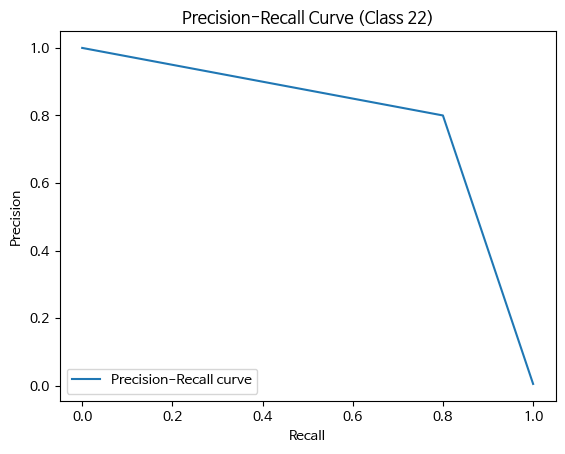

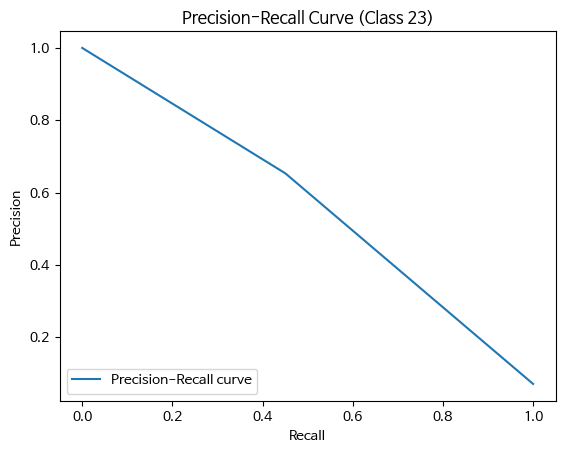

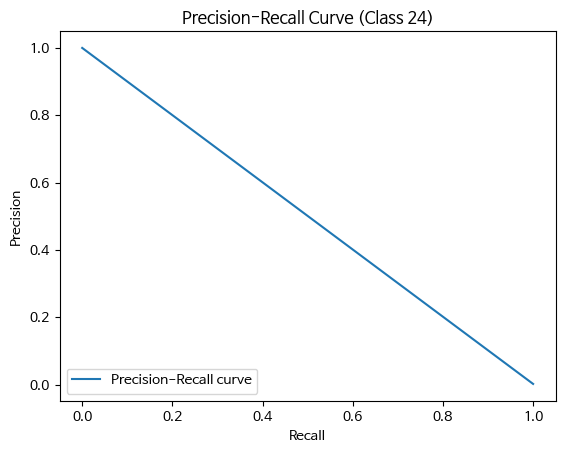

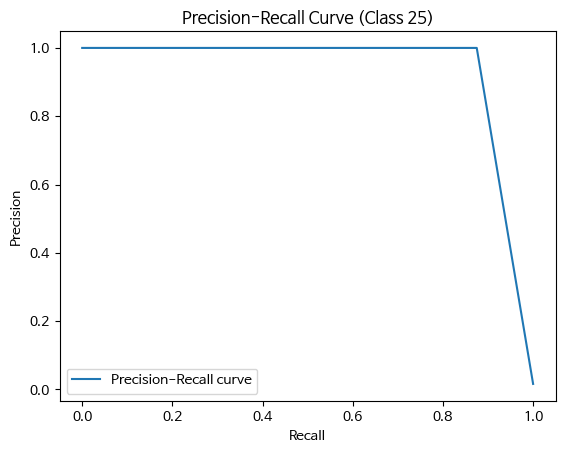

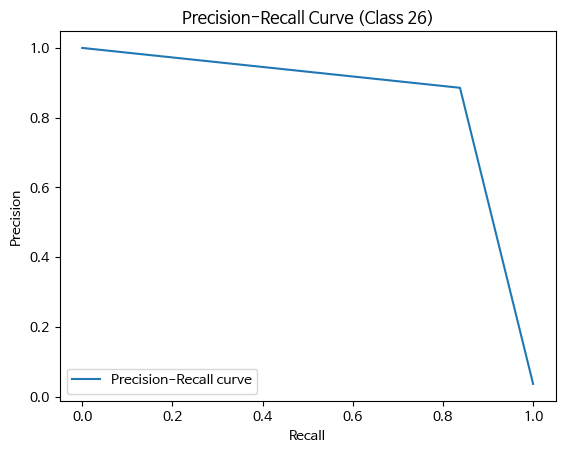

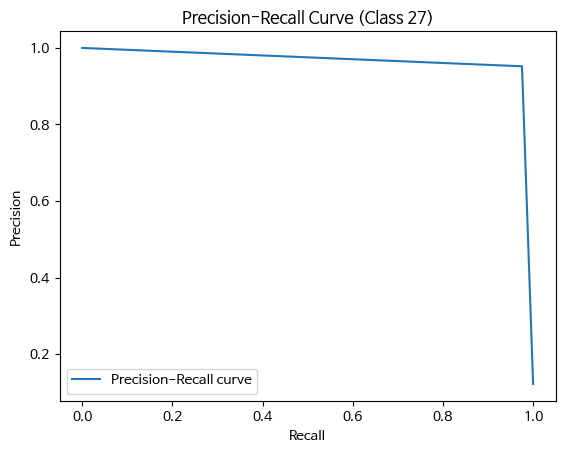

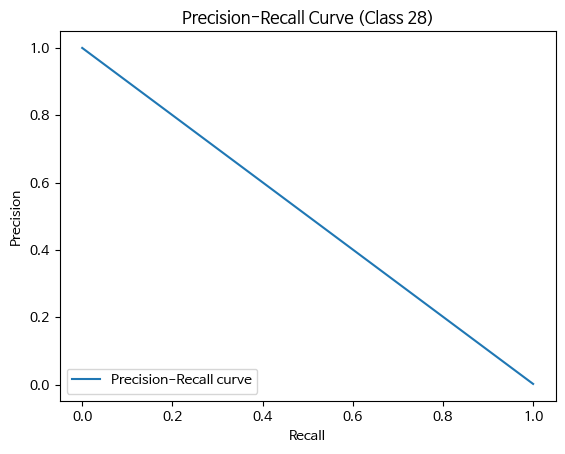

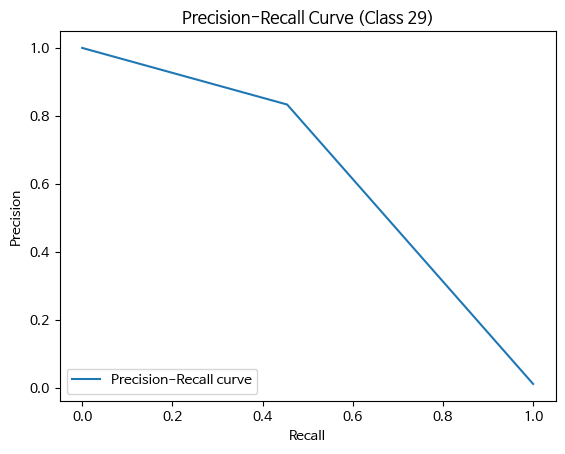

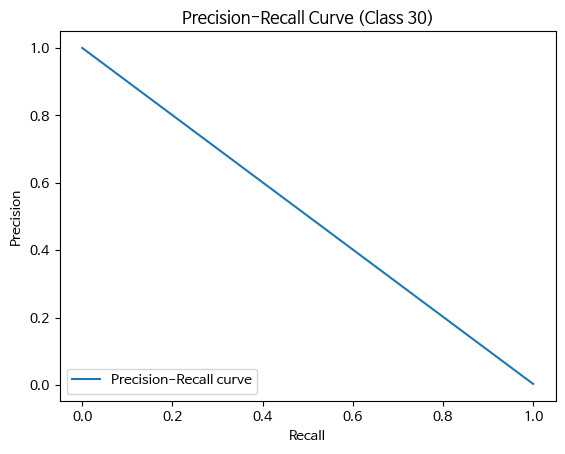

In [13]:
# prompt: roc 커브와 precision plot을 그려다오

from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Assuming you have y_true (true labels) and y_pred_prob (predicted probabilities)
# y_pred_prob should be the probability of the positive class

# If y_true and y_pred are multiclass, you need to binarize them first
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_true))


# Now you can iterate through each class and plot the ROC curve
n_classes = y_true_bin.shape[1]
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (Class {i})') # Added class label to the title
    plt.legend(loc="lower right")
    plt.show()


# Calculate and plot the precision-recall curve for each class
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])

    plt.figure()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (Class {i})')  # Added class label to the title
    plt.legend(loc="lower left")
    plt.show()

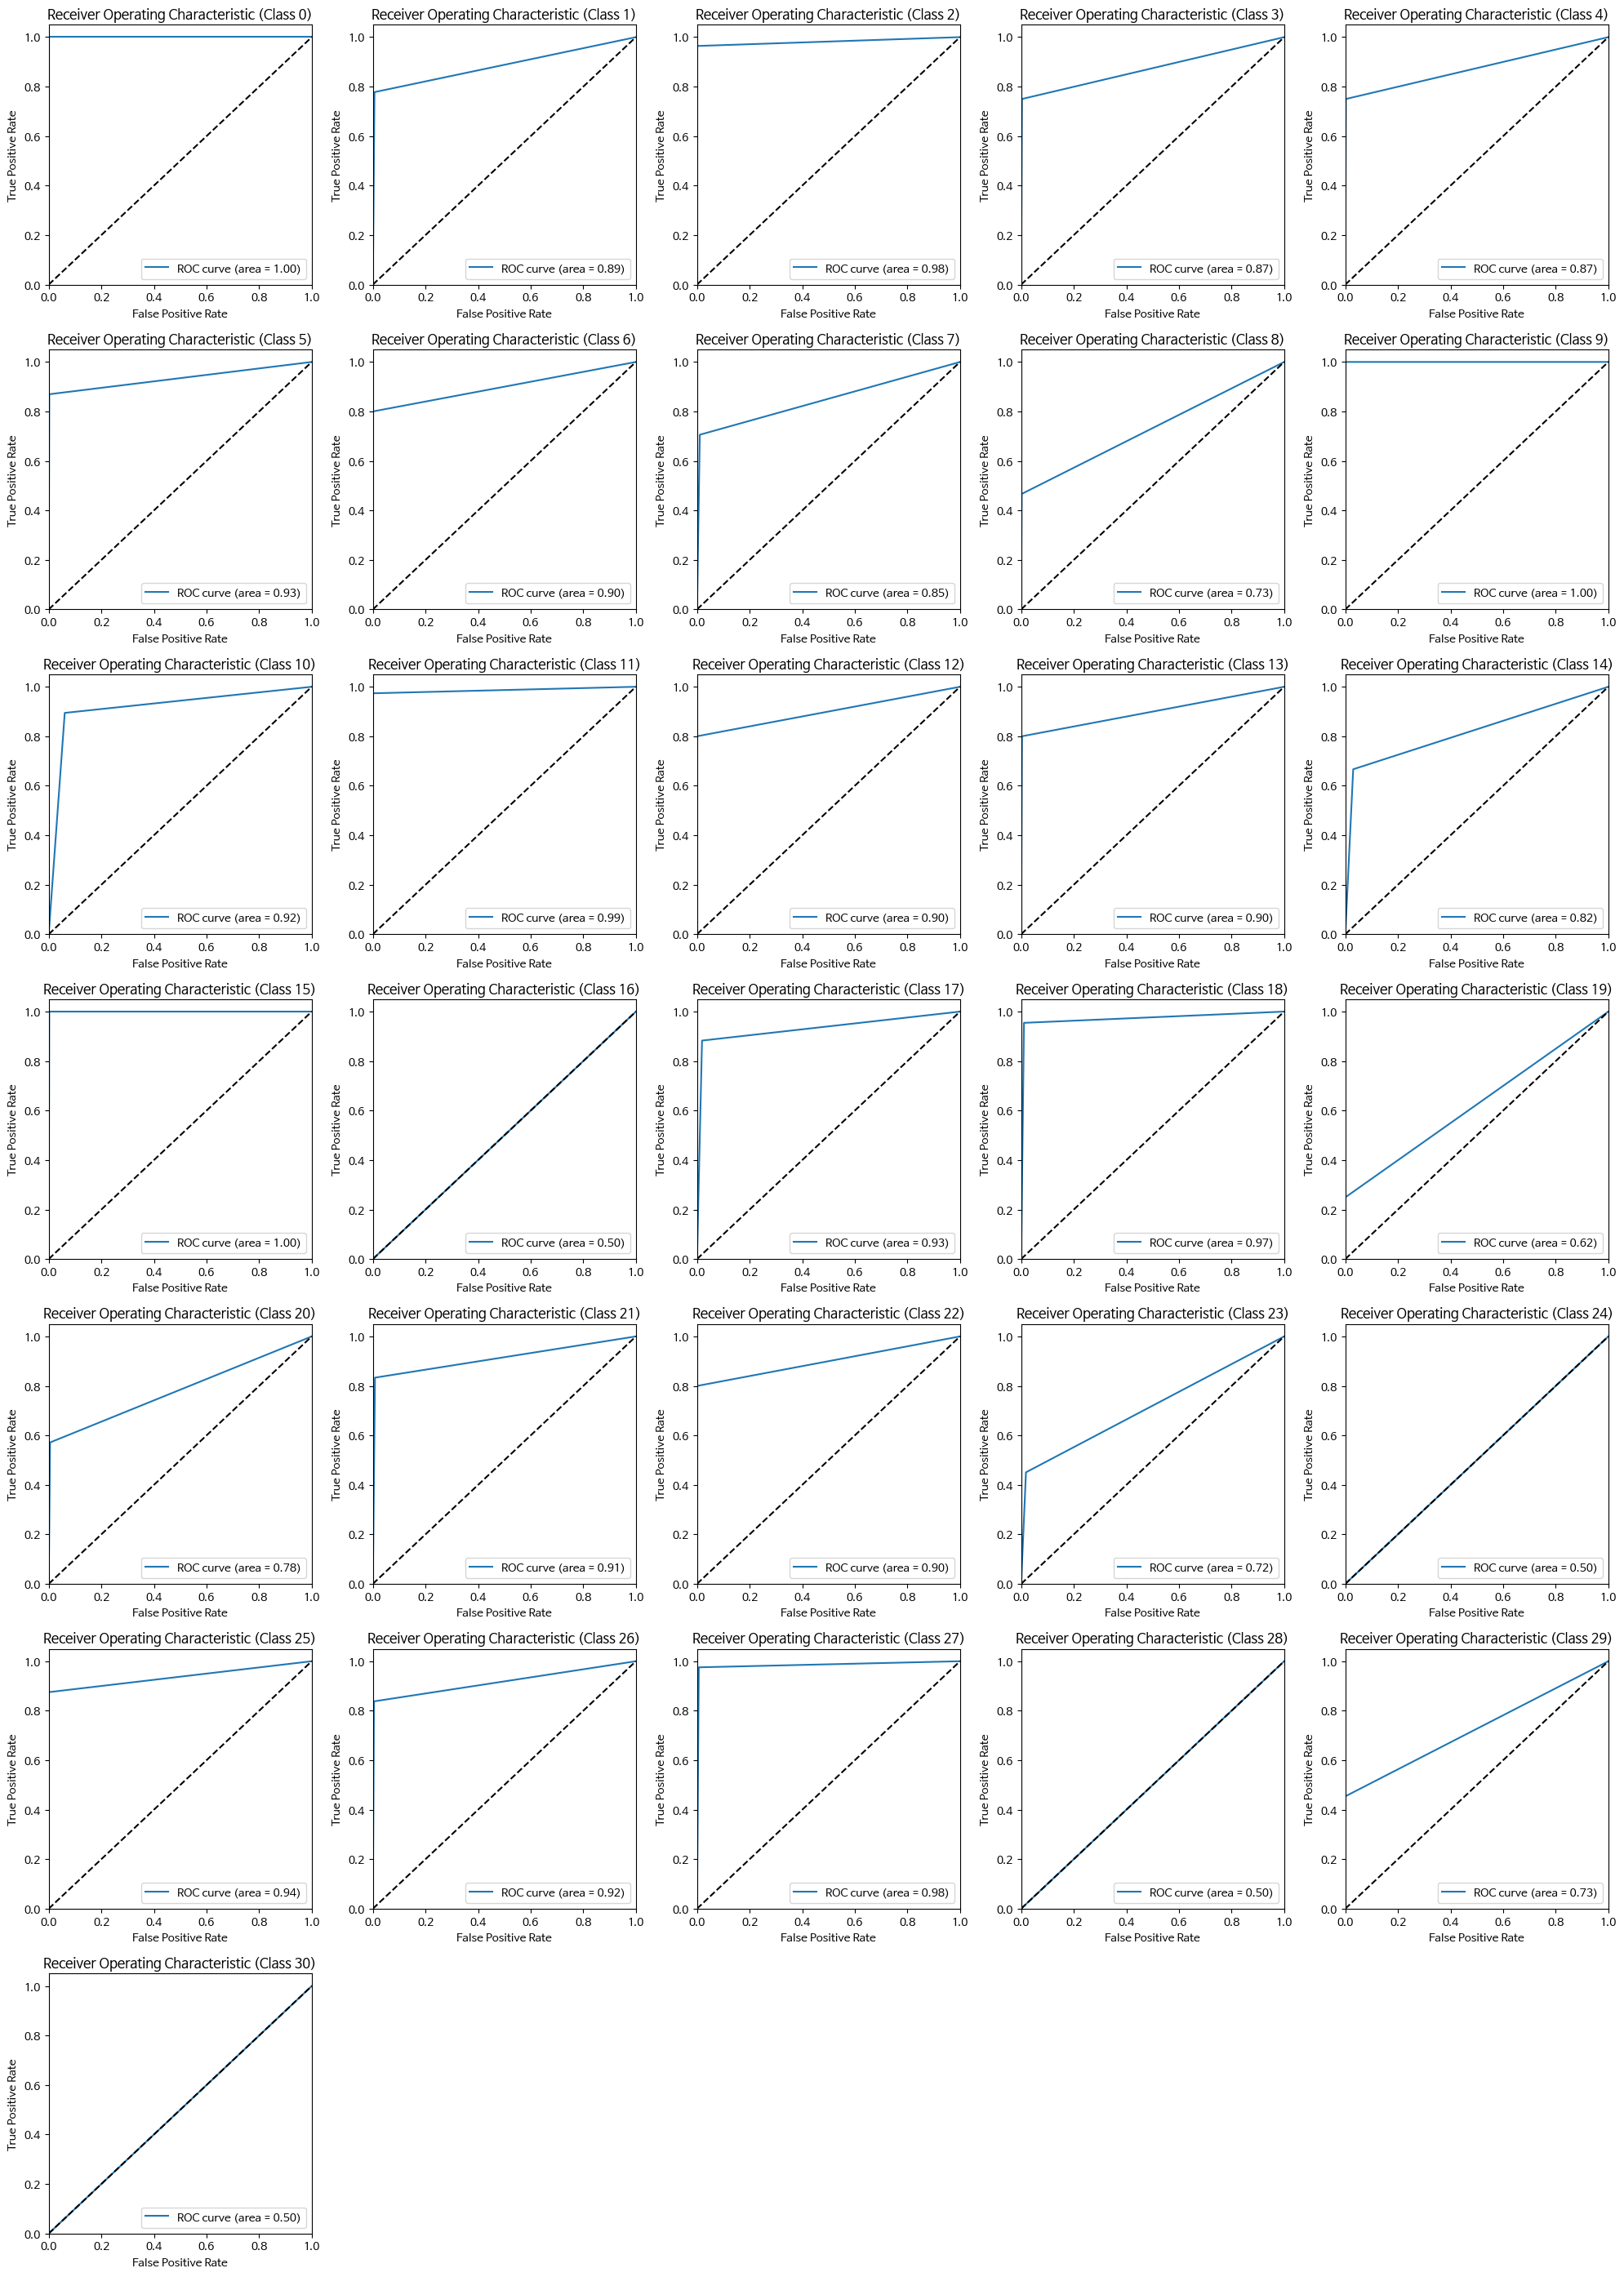

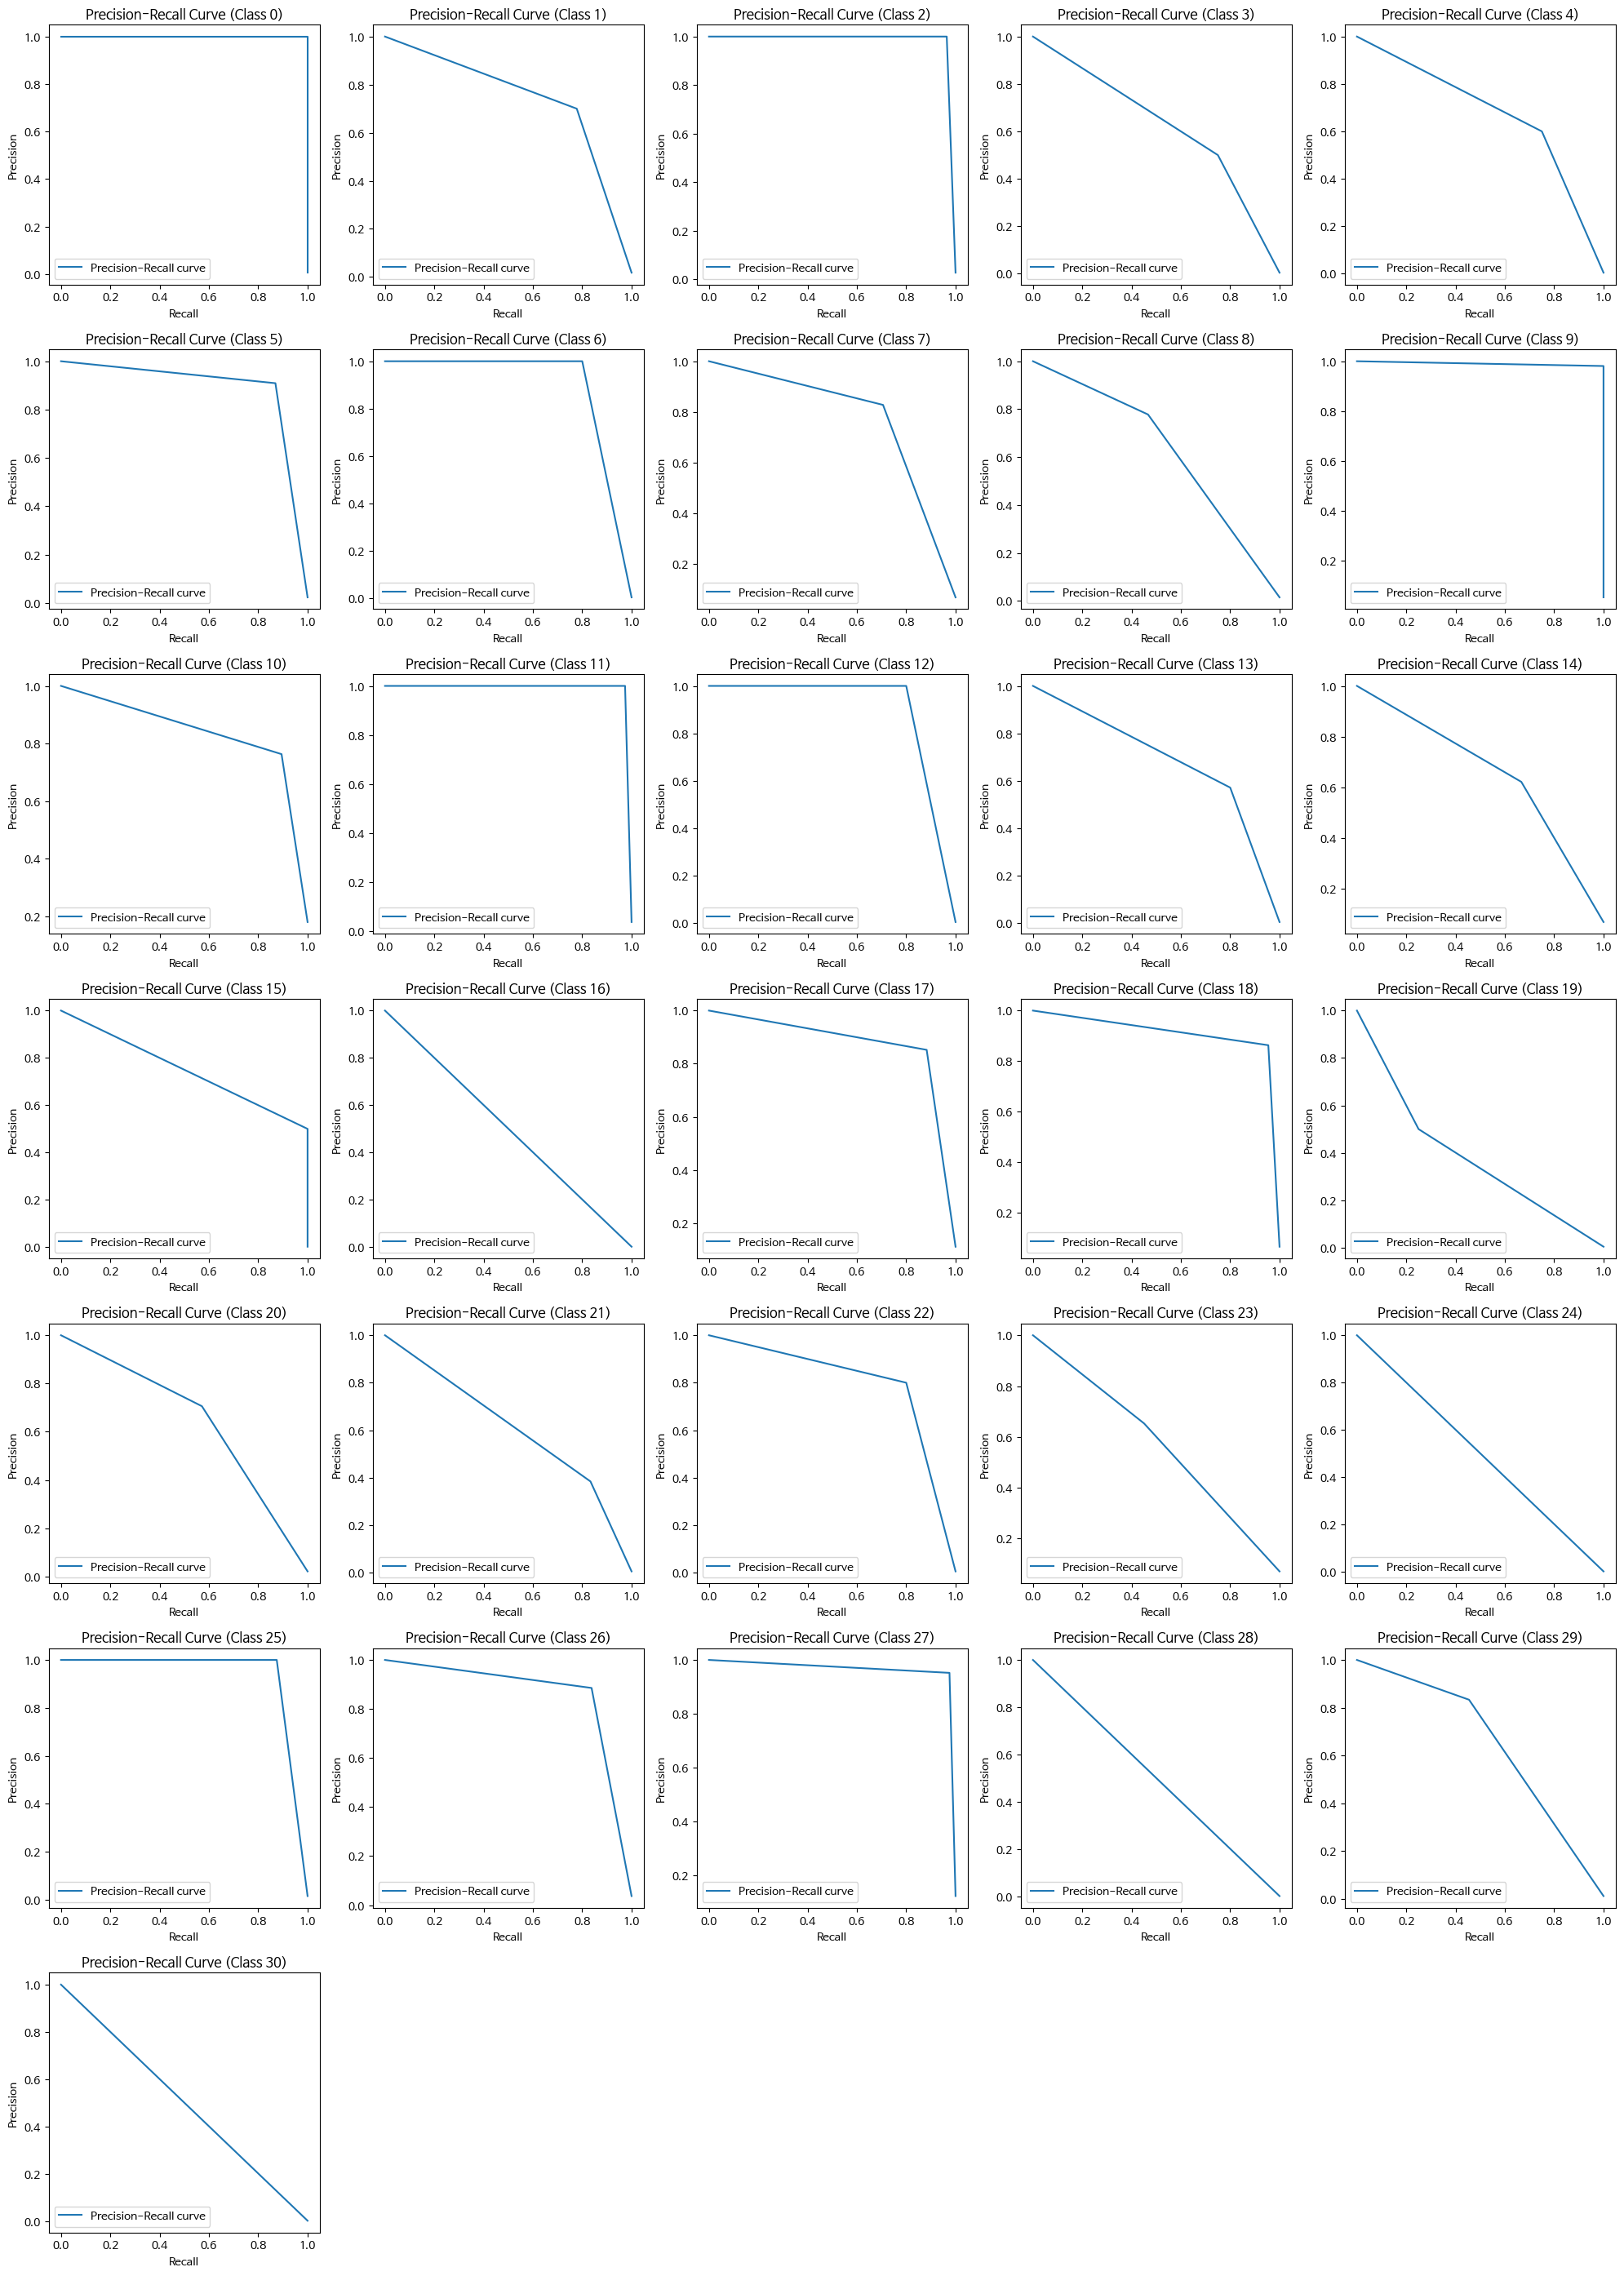

In [14]:
# prompt: 한 줄에 5개씩 그려줘

# Assuming you have y_true (true labels) and y_pred_prob (predicted probabilities)
# y_pred_prob should be the probability of the positive class

# If y_true and y_pred are multiclass, you need to binarize them first
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_true))


# Now you can iterate through each class and plot the ROC curve
n_classes = y_true_bin.shape[1]
fig, axes = plt.subplots(nrows=(n_classes + 4) // 5, ncols=5, figsize=(20, 4 * ((n_classes + 4) // 5)))  # Adjust figsize as needed
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)

    row = i // 5
    col = i % 5
    axes[row, col].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[row, col].plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    axes[row, col].set_xlim([0.0, 1.0])
    axes[row, col].set_ylim([0.0, 1.05])
    axes[row, col].set_xlabel('False Positive Rate')
    axes[row, col].set_ylabel('True Positive Rate')
    axes[row, col].set_title(f'Receiver Operating Characteristic (Class {i})') # Added class label to the title
    axes[row, col].legend(loc="lower right")

# Hide any unused subplots
for i in range(n_classes, (n_classes + 4) // 5 * 5):
    row = i // 5
    col = i % 5
    fig.delaxes(axes[row, col])


plt.tight_layout()
plt.show()

# Calculate and plot the precision-recall curve for each class
fig, axes = plt.subplots(nrows=(n_classes + 4) // 5, ncols=5, figsize=(20, 4 * ((n_classes + 4) // 5)))  # Adjust figsize as needed
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])

    row = i // 5
    col = i % 5
    axes[row, col].plot(recall, precision, label='Precision-Recall curve')
    axes[row, col].set_xlabel('Recall')
    axes[row, col].set_ylabel('Precision')
    axes[row, col].set_title(f'Precision-Recall Curve (Class {i})')  # Added class label to the title
    axes[row, col].legend(loc="lower left")

# Hide any unused subplots
for i in range(n_classes, (n_classes + 4) // 5 * 5):
    row = i // 5
    col = i % 5
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()